# 반갑습니다 13기 여러분

과제를 진행해 볼게요

혹시라도 도저히 모르겠거나 해결이 안되신다면 01040493041로 전화주시거나 카톡주세요!!

# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [40]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [41]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [42]:
X = np.stack((x1,x2,x3),axis=0)

#   설명변수들을 하나의 행렬로 만들어 줍니다

In [43]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [44]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

#### 추가로 헷갈렸던 점 정리
fit(), transform(), fit_transform 정리
https://www.inflearn.com/questions/19038

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [46]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [47]:
features = X_std.T     # transpose 근데 왜 해주는 걸까요? -> 추가설명

In [48]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [49]:
cov_matrix = np.cov(features)

In [50]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

## 추가 설명
X_std -> 20 by 3 matrix
features -> X_std.T : 3 by  20 matrix  

np.cov 공분산을 구해주는 함수는 
np.cov(a) 를 넣으면 a가 4 by 3 행렬일 때, (4*3)(3*4) -> (4*4) 행렬을 구해준다.  

그래서 np.cov(features)는 (3 by 20)(20 by 3) -> (3*3)
features를 넣어줘야 x1,x2,x3의 서로 공분산으로 이뤄진 공분산 행렬을 구할 수 있다.

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [51]:
# eigenvalues & eigenvectors
# lin.eig 를 사용하면 고유값 먼저 나오고 고유벡터 나옴

print(lin.eig(cov_matrix))
eigenvalues = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

(array([1.48756162, 0.94435407, 0.72597904]), array([[ 0.47018528, -0.85137353, -0.23257022],
       [-0.64960236, -0.15545725, -0.74421087],
       [-0.59744671, -0.50099516,  0.62614797]]))


In [52]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [53]:
mat = np.zeros((3,3))

In [54]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [55]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [56]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

## 추가설명  
0으로 채워진 정방행렬 mat를 만들고 대각값들을 고유값들을 가지도록 만들어줌.  
결국 고유벡터와 고유값 matrix를 가지게되었음.  
### Av = lambda*v
- 공분산행렬 A = X_std
- v = 고유벡터 eigenvectors
- lambda * I (identity) = mat

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

## 강의자료 - PCA 공분산 행렬의 스펙트럼 분해 참고  
공분산행렬 시그마는 PAP(T)로 분해된다.  
P는 고유벡터의 열로 구성된 행렬  
A는 고유값을 대각원소로 하는 대각행렬(여기서는 mat)  

![스펙트럼 분해](spectrum.jpg)

In [57]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [58]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
            # X의 원소와 eigenvectors의 원소 차례로 내적.
        else:
            # print(new)
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
            
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다
# projection -> 기본데이터에다가 고유벡터들을 내적해줌. 
# for i  사용해서 [0] 과 [1],[2] 나눈이유는 배열 쌓아올리기 위해서....

In [59]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

In [60]:
a = new_coordinates(X_std,eigenvectors)
type(a)

numpy.ndarray

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [61]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)
    
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    new_coordinates(x_std,eigenvectors)      # projection
    
    new_coordinate = new_coordinates(x_std,eigenvectors)      # projection해서 새롭게 얻은 값의 array
    
    index = eigenvalues.argsort()      # 고유값을 오름차순으로 sort해줌 반환값은 본래 배열의 위치
    index = list(index)
    
          
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]     # ?
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [62]:
b = MYPCA(X,3)

In [63]:
if b.all == a.all:
    print("안달라졌는데")
else: 
    print("달라졌는데, 어디가?")
    
    #  안달라졌는지 알았는데 달라지긴 했나봄.

달라졌는데, 어디가?


In [64]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [65]:
from sklearn.decomposition import PCA
pca = PCA()

In [66]:
pca.fit_transform(X_std)
# if n_components is not set all components are kept: n_components == min(n_samples, n_features)

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [67]:
MYPCA(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [68]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


# fetch_openml
# mnist 손글씨 데이터를 불러옵니다

In [69]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [70]:
np.shape(X)

(70000, 784)

In [71]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [72]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [74]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [75]:
from sklearn.model_selection import train_test_split
# 스케일링 -> split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

## 데이터셋 나누고 스케일하는 것 유의!
train 셋에는 fit_transform 이고  
test 셋에는 train셋에서 얻은 값을 적용만한는 transform이다.

### PCA 사용하기위해 하이퍼파라미터 찾기
### n_components 설정을 위해 참고
https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA  

디폴트는 n_components == min(n_samples,n_features) 로 모든 구성요소의 유지인듯. 정수값을 넣어줌.   
다른 옵션으로 n_components == mle나 svd_solver =='full'있음.  


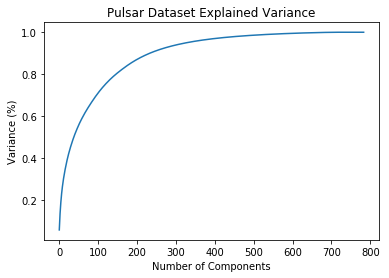

In [76]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train2)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

#### elbow point는 300정도로 보이지만 너무 커서 여러가지 조정해봄.

In [77]:
pca = PCA(n_components = 300)
X_pca = pca.fit_transform(X_train2)
sum(pca.explained_variance_ratio_)

0.938112424860906

In [78]:
pca = PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit(X_train2)  #주성분 분석
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.70) + 1 # 분산의 설명량이 70%이상 되는 차원의 수

In [79]:
num_d

97

In [80]:
# 분산의 설명량이 60%이상 되는 차원의 수
num_d2 = np.argmax(cumsum >= 0.60) + 1 

num_d2

63

참고  
http://textmining.kr/?p=362

In [81]:
# n_components는 95쯤으로 생각하고 pca진행

pca_95 = PCA(n_components = 95)
X_pca95 = pca_95.fit_transform(X_train2)
X_test95 = pca_95.transform(X_test2)

# test셋은 pca가 안되어 있어서 모델을 예측(pred)할때 오류가 남.
# X_test에도 pca적용

In [82]:
np.shape(X_pca95),np.shape(X_test95)     # 주성분의 갯수가 300개로 줄어듬. feature의 갯수 300개

((56000, 95), (14000, 95))

In [83]:
# randomized pca
rnd_pca = PCA(svd_solver='randomized',random_state=42)

rnd_pca.fit(X_train2)  
cumsum = np.cumsum(rnd_pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_rnd_d = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수

In [86]:
num_rnd_d     # 그냥 pca와 비슷하다.

329

In [41]:
# 데이터의 분포를 한번 살펴보기 위해서 시각화해보려고 했지만 차원이 300이라 안됨!
# 좋은 방법있으면 알려주세요~!

"""
plt.figure()
plt.plot(X_pca,y_train)
plt.xlabel('X_pca')
plt.ylabel('y_train') 
plt.title('X_pca 시각화')
plt.show()
"""

"\nplt.figure()\nplt.plot(X_pca,y_train)\nplt.xlabel('X_pca')\nplt.ylabel('y_train') \nplt.title('X_pca 시각화')\nplt.show()\n"

## LightGBM 사용

In [103]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from tqdm import tqdm,tqdm_notebook
from time import sleep
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [100]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [107]:
%time lgbm.fit(X_pca95,y_train.ravel())
# %time을 통해 피팅에 걸리는 시간 파악

Wall time: 1min 53s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
y_pred = lgbm.predict(X_test95)

print('Accuracy score:')
print(accuracy_score(y_test.ravel(),y_pred))
print('Classification_report:')
print(classification_report(y_test.ravel(),y_pred))

Accuracy score:
0.9498571428571428
Classification_report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1349
         1.0       0.99      0.99      0.99      1581
         2.0       0.94      0.95      0.94      1400
         3.0       0.93      0.94      0.93      1434
         4.0       0.94      0.96      0.95      1328
         5.0       0.94      0.92      0.93      1286
         6.0       0.98      0.97      0.97      1407
         7.0       0.95      0.96      0.96      1476
         8.0       0.93      0.93      0.93      1391
         9.0       0.93      0.91      0.92      1348

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [110]:
# lightGBM의 하이퍼파라미터를 그리드서치로 찾아보자

param_grid = {'boosting_type':['gbdt','dart','goss','rf'],'learning_rate':[0.05,0.1,0.15,0.2]}
grid = GridSearchCV(lgbm,param_grid,cv=3,return_train_score=True,scoring = 'accuracy',verbose=3)
%time grid.fit(X_pca95,y_train.ravel())

print("best parameters:{}".format(grid.best_params_))
print("best score:{}".format(grid.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=0.965, test=0.927), total= 1.5min
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=0.966, test=0.927), total= 1.6min
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=0.965, test=0.925), total= 1.8min
[CV] boosting_type=gbdt, learning_rate=0.1 ...........................
[CV]  boosting_type=gbdt, learning_rate=0.1, score=(train=0.997, test=0.946), total= 1.7min
[CV] boosting_type=gbdt, learning_rate=0.1 ...........................
[CV]  boosting_type=gbdt, learning_rate=0.1, score=(train=0.997, test=0.948), total= 1.7min
[CV] boosting_type=gbdt, learning_rate=0.1 ...........................
[CV]  boosting_type=gbdt, learning_rate=0.1, score=(train=0.997, test=0.947), total= 1.9min
[CV] boosting_type=gbdt, learning_rate=0.15 ..........................
[CV]  boosting_type=gbdt, learning_rate=0.15, score=(train=1.000, test=0.952), total= 2.0min
[CV] boosting_type=gbdt, learning_rate=0.15 ..........................
[CV]  boosting_type=gbdt, learning_rate=0.15, score=(train=1.000, test=0.954), total= 2.0min
[CV] boosting_type=gbdt, learning_rate=0.15 ..........................
[CV]  boosting_type

C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.05, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.05 ............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.05, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.05 ............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.05, score=(train=nan, test=nan), total=   0.9s
[CV] boosting_type=rf, learning_rate=0.1 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.1, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.1 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.1, score=(train=nan, test=nan), total=   0.9s
[CV] boosting_type=rf, learning_rate=0.1 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.1, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.15 ............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.15, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.15 ............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.15, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.15 ............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.15, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.2 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.2, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.2 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


[CV]  boosting_type=rf, learning_rate=0.2, score=(train=nan, test=nan), total=   0.8s
[CV] boosting_type=rf, learning_rate=0.2 .............................


C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 55.7min finished


[CV]  boosting_type=rf, learning_rate=0.2, score=(train=nan, test=nan), total=   0.9s
Wall time: 56min 28s
best parameters:{'boosting_type': 'goss', 'learning_rate': 0.2}
best score:0.9574464355597208


In [111]:
# best parameters:{'boosting_type': 'goss', 'learning_rate': 0.2}
# best score:0.9574464355597208

# best 파라미터를 사용해서 튜닝하고 다시 한번 light gbm
lgbm = LGBMClassifier(boosting_type='goss',learning_rate=0.2)

%time lgbm.fit(X_pca95,y_train.ravel())
# %time을 통해 피팅에 걸리는 시간 파악

Wall time: 49.3 s


LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [112]:
y_pred = lgbm.predict(X_test95)

print('Accuracy score:')
print(accuracy_score(y_test.ravel(),y_pred))
print('Classification_report:')
print(classification_report(y_test.ravel(),y_pred))

Accuracy score:
0.9608571428571429
Classification_report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1349
         1.0       0.99      0.99      0.99      1581
         2.0       0.95      0.96      0.96      1400
         3.0       0.95      0.95      0.95      1434
         4.0       0.96      0.97      0.97      1328
         5.0       0.96      0.94      0.95      1286
         6.0       0.98      0.97      0.98      1407
         7.0       0.96      0.97      0.97      1476
         8.0       0.94      0.95      0.94      1391
         9.0       0.94      0.93      0.93      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



## LGBM 사용하고 하이퍼파라미터 튜닝을 통해서 accuracy 0.96까지 끌어올림.

## SVM 사용

In [ ]:
"""
# 파라미터 대강 설정
svc_temp = SVC(C=10,kernel='linear',gamma='scale')
svc_temp.fit(X_pca,y_train.ravel())

y_pred = svm_temp.predict(X_pca)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
"""

### 참고 
https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected  

.values will give the values in an array. (shape: (n,1)

.ravel will convert that array shape to (n, )

## SVM 단점
SVM 을 이 데이터셋에 사용하는 것은 잘못된 선택이었던 것 같다.  
데이터가 56000개이고 gridsearch를 진행하니 18케이스 중에 찾는 것도 한 케이스당 6분이 걸릴 정도로 매우 느리다.  
그리드 서치를 포기하고 아무 파라미터로 하고 돌려도 봤는데 학습되다가 컴퓨터가 멈춰서 포기했다.  
반면 그리드서치 중에 accuracy score는 0.9 정도로 높게 나오는데 과적합되는 것 같다.  
단점을 보완하기 위해 트리 기반의 모델을 많이 사용한다고 하니 트리기반의 모델을 사용해보겠다.

시도해볼 모델 : XGboost, 나이브베이즈 (선형일때, 큰 데이터셋에 시도해볼만하다고함.)
#### 데이터가 10000개 넘어가면 svm 자제 하기 명심 명심....!

추가 svm 참고 사이트  
https://nonmeyet.tistory.com/entry/Python-SVM-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B0%B1%ED%84%B0-%EB%A8%B8%EC%8B%A0%EC%9D%98-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%98%88%EC%8B%9C-%EC%BD%94%EB%93%9Csklearn-2


## Random Forest 사용

In [114]:
# 랜덤포레스트 따라해보기
from sklearn.ensemble import RandomForestClassifier

In [118]:
model_rf = RandomForestClassifier()
%time model_rf.fit(X_pca95,y_train.ravel())

y_pred_rf = model_rf.predict(X_test95)

Wall time: 1min 11s


In [120]:
print('Accuracy score:')
print(accuracy_score(y_test.ravel(),y_pred_rf.ravel()))
print('Classification_report:')
print(classification_report(y_test.ravel(),y_pred_rf.ravel()))

Accuracy score:
0.9449285714285715
Classification_report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1349
         1.0       0.99      0.98      0.98      1581
         2.0       0.93      0.95      0.94      1400
         3.0       0.90      0.94      0.92      1434
         4.0       0.94      0.97      0.95      1328
         5.0       0.95      0.91      0.93      1286
         6.0       0.97      0.97      0.97      1407
         7.0       0.94      0.95      0.94      1476
         8.0       0.94      0.91      0.92      1391
         9.0       0.93      0.89      0.91      1348

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.95      0.94      0.94     14000



mnist 데이터셋으로 디폴트된 값으로 랜덤포레스트를 시키면 0.945의 성능을 보임.